In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper', font_scale=1.3)
red, blue, green = sns.color_palette('Set1', 3)

import warnings
warnings.simplefilter('ignore', DeprecationWarning)

In [11]:
import curveball

In [16]:
deg = '39'
df = pd.read_excel('../data/growth/Evo30vsEvo39_YPD{}deg.xlsx'.format(deg), header=None, index_col=0).T
df = df.rename(columns={'time': 'Time'})
df['Time'] /= 60*60 # seconds -> hours
df.head()

/Users/adsurbum/opt/miniconda3/envs/py371/lib/python3.7/site-packages/ipykernel/__main__.py:2: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  from ipykernel import kernelapp as app


,evo30,evo30,evo39,evo30,evo30,evo39,evo30,evo39,evo30,evo39,...,evo30,evo39,evo30,evo39,evo30,evo39,evo30,evo39,evo30,Time
1,0.0584,0.0580,0.0572,0.0566,0.0581,0.0558,0.0571,0.0578,0.0579,0.0561,...,0.0574,0.0566,0.0560,0.0559,0.0581,0.0570,0.0574,0.0575,0.0605,0.000000
2,0.0609,0.0607,0.0590,0.0595,0.0599,0.0605,0.0615,0.0600,0.0589,0.0598,...,0.0597,0.0590,0.0611,0.0608,0.0619,0.0585,0.0617,0.0614,0.0628,0.500556
3,0.0645,0.0648,0.0626,0.0646,0.0644,0.0646,0.0635,0.0625,0.0627,0.0631,...,0.0625,0.0604,0.0624,0.0620,0.0646,0.0616,0.0652,0.0629,0.0684,1.000556
4,0.0661,0.0659,0.0631,0.0642,0.0647,0.0637,0.0659,0.0628,0.0651,0.0625,...,0.0627,0.0625,0.0628,0.0617,0.0645,0.0614,0.0643,0.0618,0.0659,1.500556
5,0.0675,0.0666,0.0674,0.0665,0.0667,0.0665,0.0650,0.0661,0.0653,0.0664,...,0.0658,0.0637,0.0655,0.0644,0.0661,0.0657,0.0654,0.0648,0.0673,2.000833


In [13]:
df = pd.melt(df, id_vars='Time', var_name='Strain', value_name='OD')
df.head()

,Time,Strain,OD
0,0.000000,evo30,0.0584
1,0.500556,evo30,0.0609
2,1.000556,evo30,0.0645
3,1.500556,evo30,0.0661
4,2.000833,evo30,0.0675


In [14]:
df

,Time,Strain,OD
0,0.000000,evo30,0.0584
1,0.500556,evo30,0.0609
2,1.000556,evo30,0.0645
3,1.500556,evo30,0.0661
4,2.000833,evo30,0.0675
...,...,...,...
2613,14.500000,evo30,0.6678
2614,15.000556,evo30,0.6660
2615,15.500278,evo30,0.6651
2616,16.000833,evo30,0.6683


/Users/adsurbum/opt/miniconda3/envs/py371/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


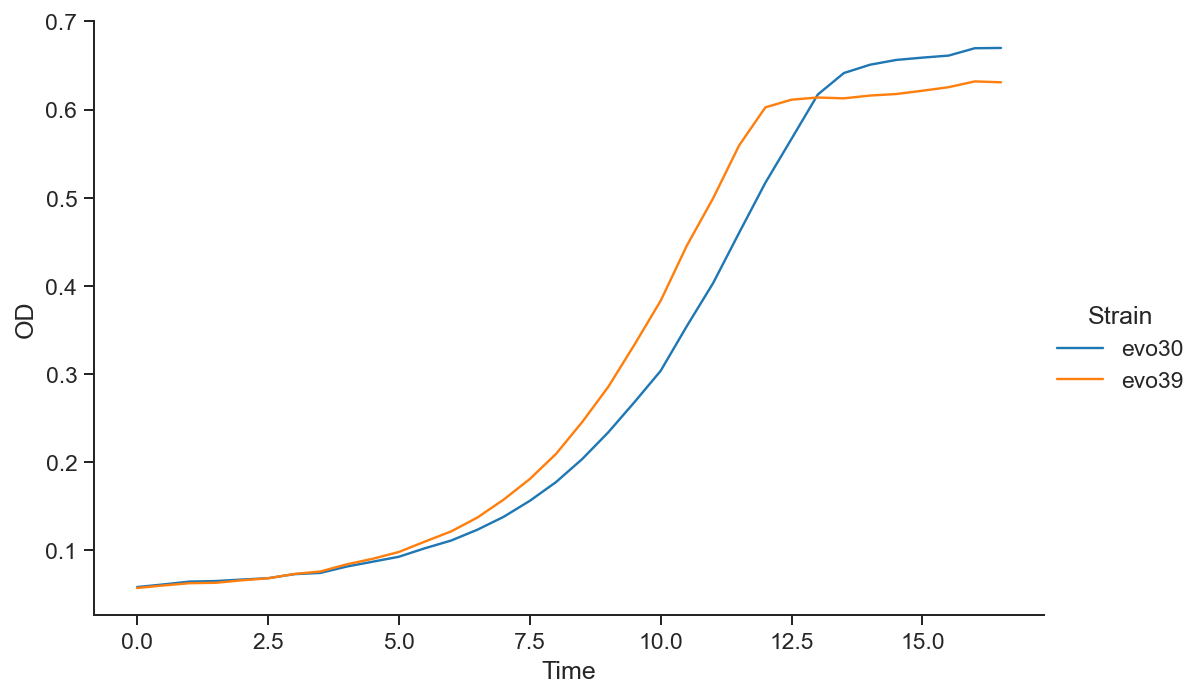

In [15]:
g = curveball.plots.plot_strains(df)
# g.axes[0,0].set(xlim=(0, 13))

In [71]:
df = df[df['Time'] <= 10]

In [72]:
df_evo30 = df[df['Strain']=='evo30']
df_evo39 = df[df['Strain']=='evo39']

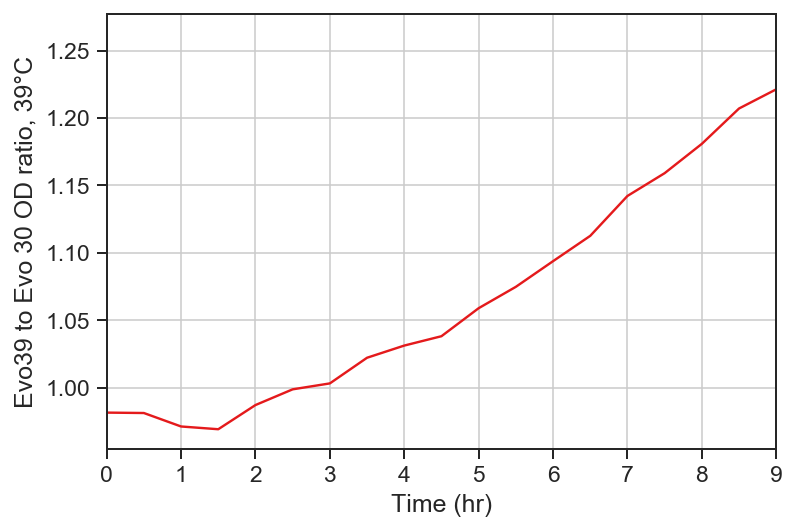

In [73]:
fig, ax = plt.subplots()
od_ratio = df_evo39.groupby('Time').mean() / df_evo30.groupby('Time').mean()
ax.plot(od_ratio.index, od_ratio['OD'], color=red)
ax.set(xlim=(0, 9), xlabel='Time (hr)', ylabel='Evo39 to Evo 30 OD ratio, {}°C'.format(deg))
ax.grid(True);

[[Model]]
    Model(RichardsLag1)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 256
    # data points      = 882
    # variables        = 5
    chi-square         = 0.04526134
    reduced chi-square = 5.1609e-05
    Akaike info crit   = -8701.94976
    Bayesian info crit = -8678.03880
[[Variables]]
    y0:  0.05940723 +/- 5.3238e-04 (0.90%) (init = 0.05767857)
    K:   0.36152757 +/- 0.04220697 (11.67%) (init = 0.3032167)
    r:   0.38520295 +/- 0.00891037 (2.31%) (init = 1.052928)
    nu:  6.66862582 +/- 3.26547559 (48.97%) (init = 1)
    q0:  0.10540368 +/- 0.00930563 (8.83%) (init = 0.02173129)


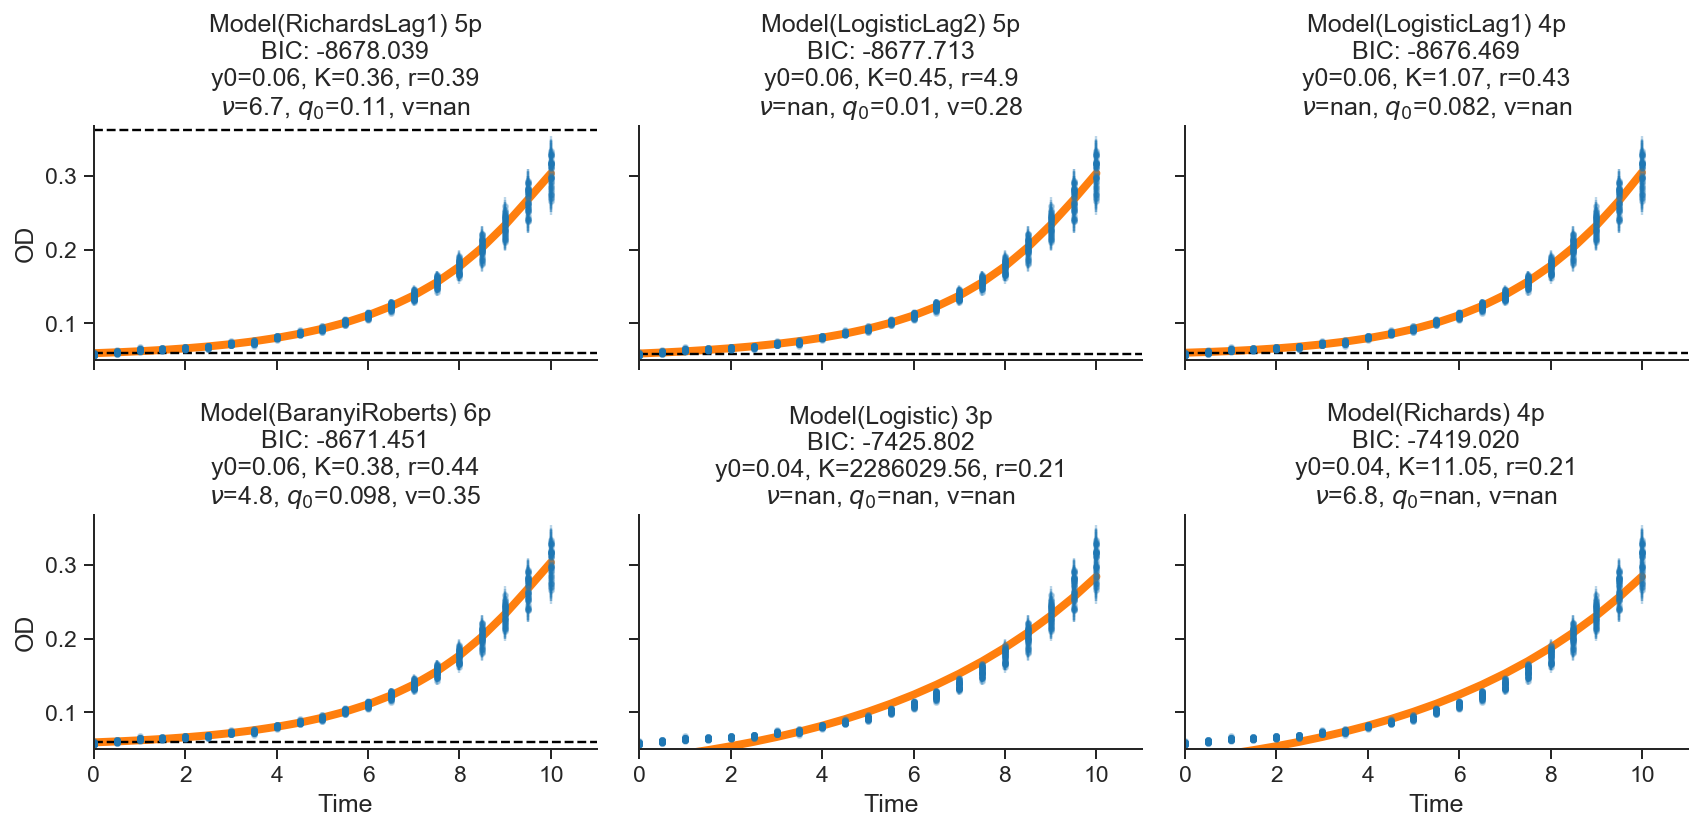

In [74]:
m_evo30, fig, axes = curveball.models.fit_model(df_evo30)

[[Model]]
    Model(RichardsLag1)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 279
    # data points      = 735
    # variables        = 5
    chi-square         = 0.04056406
    reduced chi-square = 5.5567e-05
    Akaike info crit   = -7196.48626
    Bayesian info crit = -7173.48691
[[Variables]]
    y0:  0.05770568 +/- 6.1057e-04 (1.06%) (init = 0.05661143)
    K:   0.50378700 +/- 0.07216818 (14.33%) (init = 0.3827971)
    r:   0.41037487 +/- 0.00979818 (2.39%) (init = 1.145323)
    nu:  4.60558486 +/- 1.94043432 (42.13%) (init = 1)
    q0:  0.11469627 +/- 0.01071679 (9.34%) (init = 0.0214786)


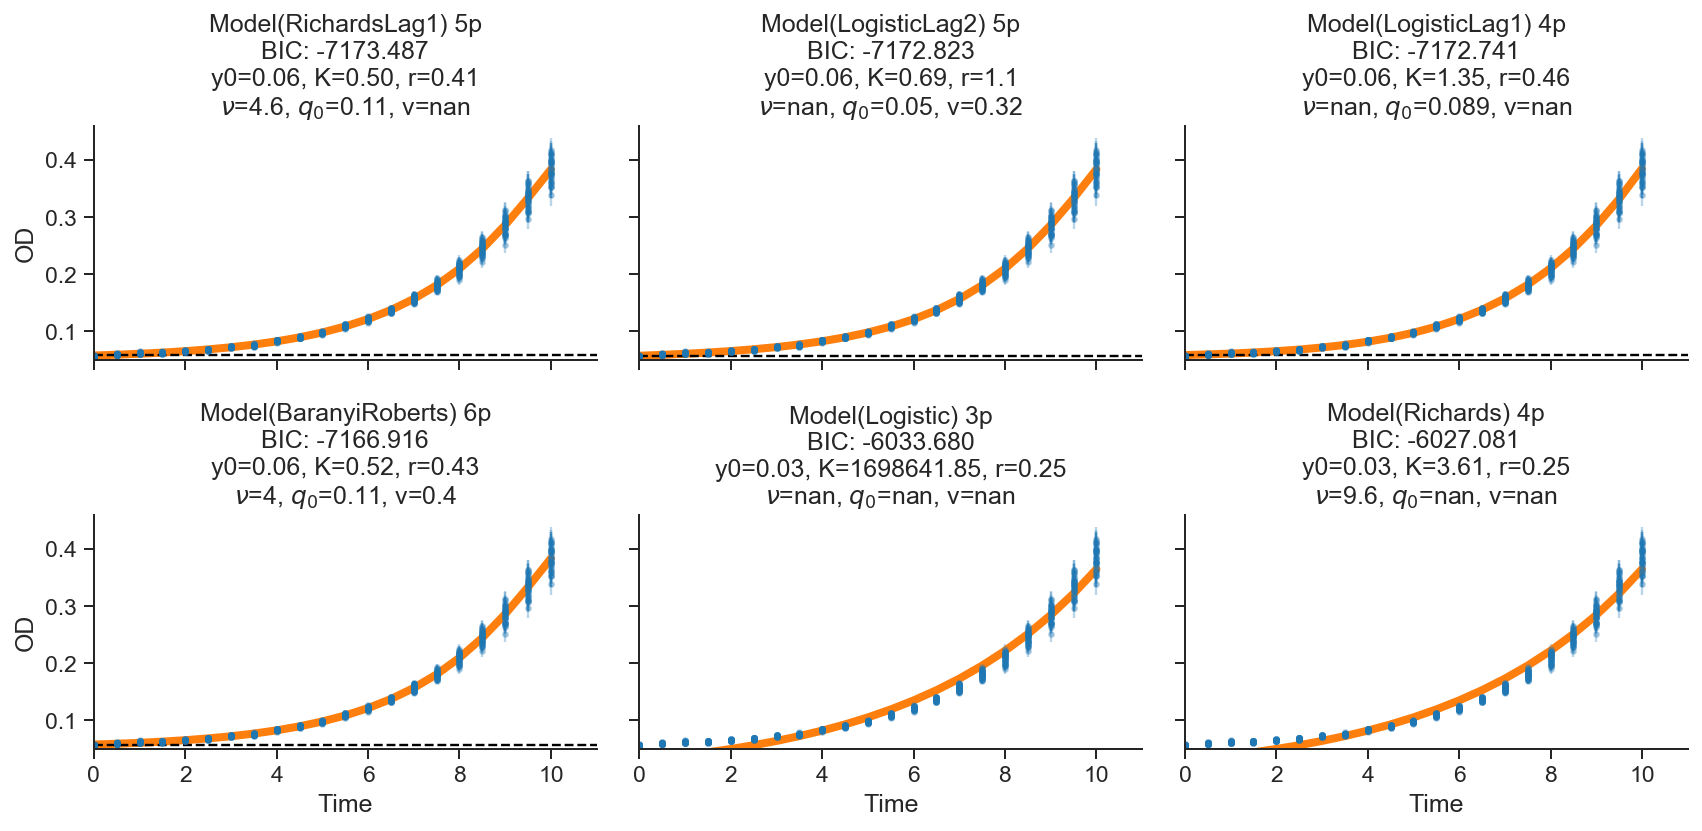

In [75]:
m_evo39, fig, axes = curveball.models.fit_model(df_evo39)

In [76]:
y0 = (m_evo30[0].params['y0'].value, m_evo39[0].params['y0'].value)
print(y0)
y0 = np.mean(y0)/2, np.mean(y0)/2
print(y0)

(0.05940723379137802, 0.05770568446830371)
(0.029278229564920433, 0.029278229564920433)


/Users/yoavram/Work/Research/Curveball_project/curveball/curveball/competitions.py:343: UserWarning: 1789 resamples lost
  warnings.warn("{0} resamples lost".format(nsamples - min_nsamples))


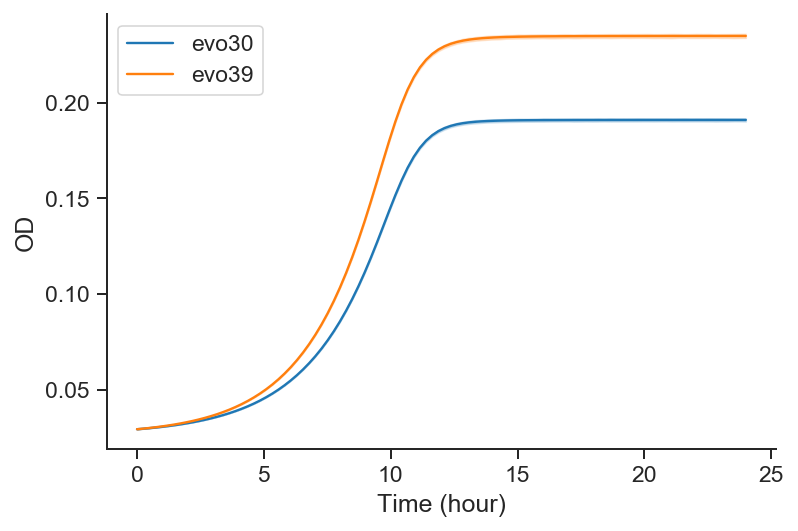

In [77]:
t, y, fig, ax = curveball.competitions.compete(m_evo30[0], m_evo39[0], y0=y0, PLOT=True, nsamples=10000)
# y = y.squeeze()
ax.legend(['evo30', 'evo39']);

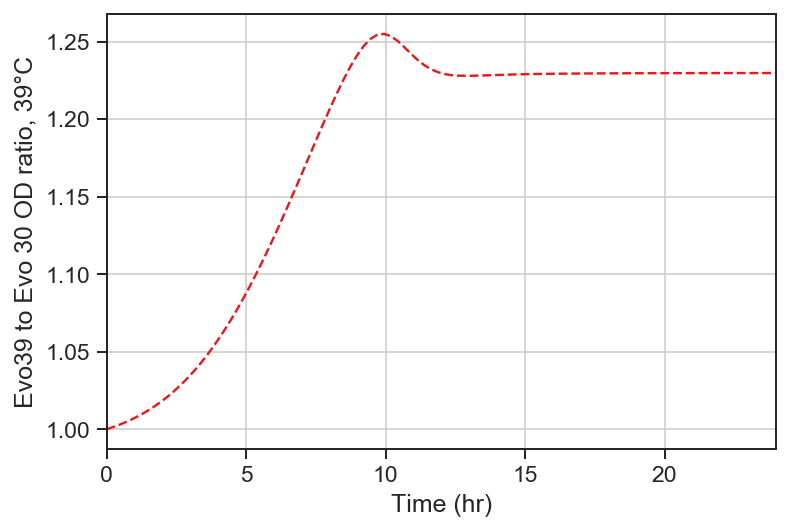

In [78]:
fig, ax = plt.subplots()

od_ratio_hat = y[:, 1].mean(axis=1)/y[:, 0].mean(axis=1)
ax.plot(t, od_ratio_hat, color=red, ls='--')
# ax.plot(od_ratio.index, od_ratio['OD'], color=red)
ax.set(xlim=(0, 24), xlabel='Time (hr)', ylabel='Evo39 to Evo 30 OD ratio, 39°C')
ax.grid(True)

w = 1.0222 (95% CI 0.9582 - 1.1139)


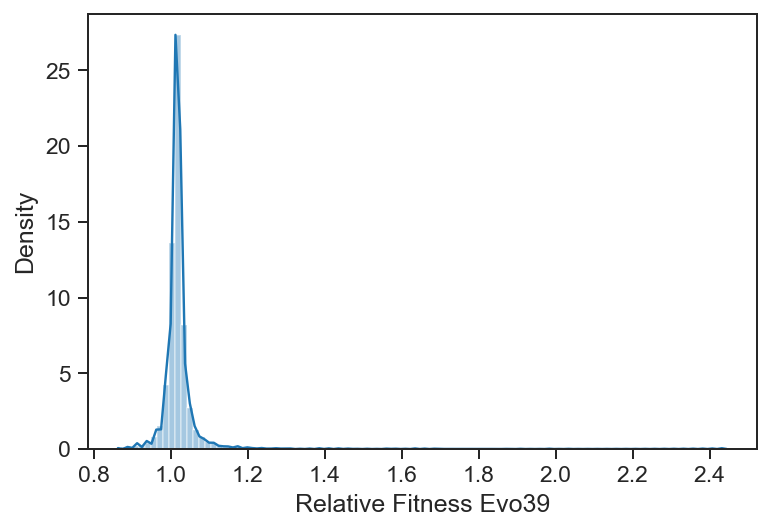

In [79]:
w = np.array([curveball.competitions.fitness_LTEE(y[:,:,i]) for i in range(y.shape[2])])
s = w - 1
s  /= np.log2(100) # convert from 24 hr to generations
w = 1 + s
ax = sns.distplot(w, bins=100, kde=True)
ax.set(xlabel='Relative Fitness Evo39', ylabel='Density');
print("w = {:.4f} (95% CI {:.4f} - {:.4f})".format(
    w.mean(), np.percentile(w, 2.5), np.percentile(w, 97.5)
))

In [80]:
np.savez_compressed('evo39_fitness_{}deg.npz'.format(deg), w)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


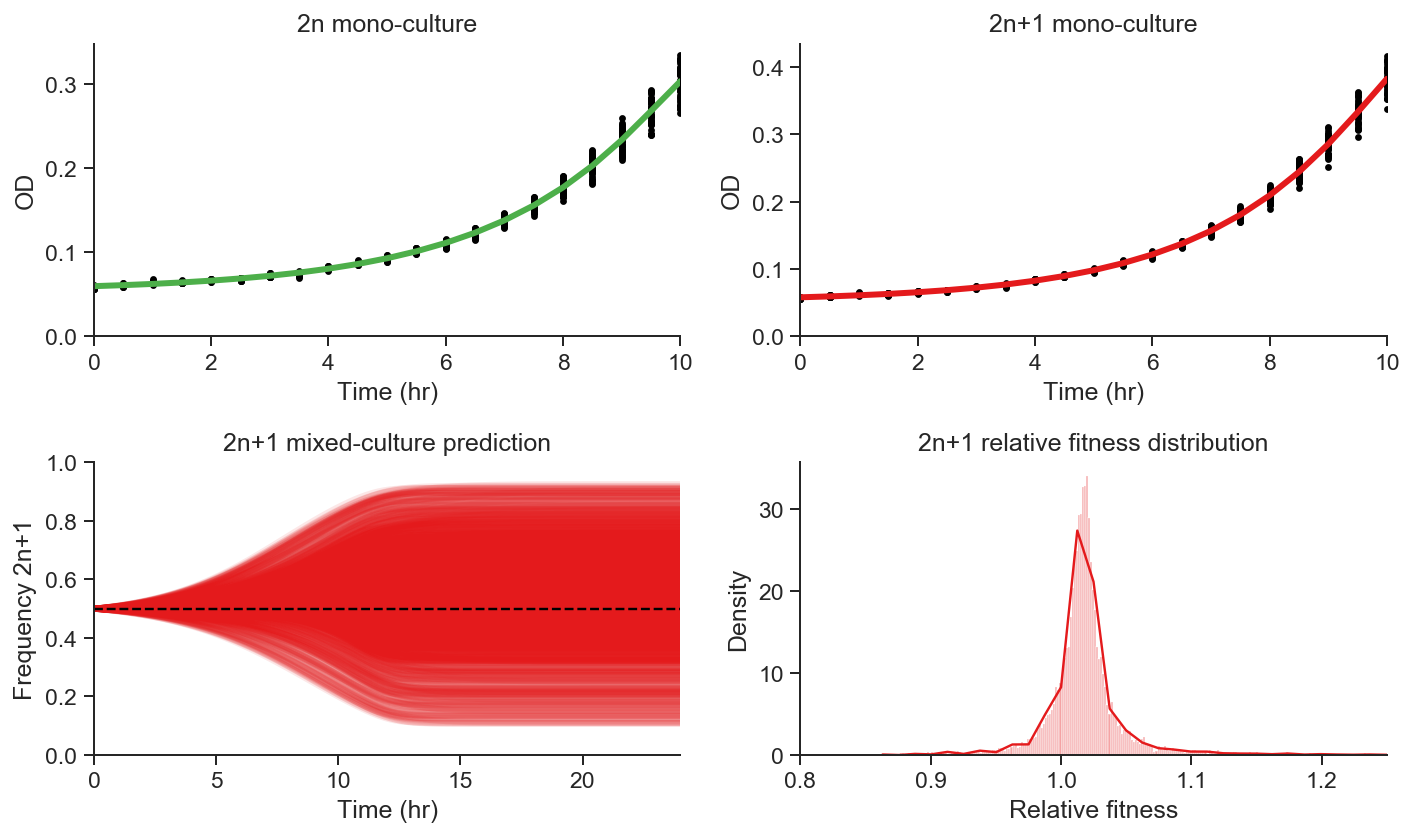

In [86]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
# mono-culture
data_kws = dict(color='k', marker='.')
evo30_kws = dict(color=green, lw=3)
evo39_kws = dict(color=red, lw=3)
m_evo30[0].plot_fit(ax=axes[0,0], fit_kws=evo30_kws, data_kws=data_kws)
m_evo39[0].plot_fit(ax=axes[0,1], fit_kws=evo39_kws, data_kws=data_kws)
for ax in axes[0]:
    ax.set(xlim=(0, None), ylim=(0, None))
axes[0,0].set(title="2n mono-culture", ylabel='OD', xlabel='Time (hr)', xlim=(0,10))
axes[0,1].set(title="2n+1 mono-culture", ylabel='OD', xlabel='Time (hr)', xlim=(0,10))

# competition
axes[1,0].plot(t, y[:,1,:]/y.sum(axis=1), **evo39_kws, alpha=0.1)
axes[1,0].set(title="2n+1 mixed-culture prediction", ylabel='Frequency 2n+1', xlim=(0,24), ylim=(0,1), xlabel='Time (hr)')
axes[1,0].axhline(0.5, ls='--', color='k')

# fitness
sns.distplot(w, bins=1000, kde=True, color=red,  ax=axes[1,1])
axes[1,1].set(title='2n+1 relative fitness distribution', xlabel='Relative fitness', ylabel='Density')

# leftovers
for ax in axes.flat:
    ax.legend().set_visible(False)   
    
fig.tight_layout()
sns.despine()
fig.savefig('../figures/evo39_fitness_{}deg.pdf'.format(deg))